In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('E:/sem5/apl302product/computational_project/ShipGen_Dataset - Copy - Copy(in).csv')

In [5]:
df.head()

,Cluster_num,Index,LOA,Lb,Ls,Bd,Dd,Bs,WL,Bc,...,Bbb,Lbbm,Rbb,Kappa_SB,Lsb,HSBOA,Hsb,Bsb,Lsbm,Rsb
0,C1,Ship1,10,0.487046,0.351399,0.324019,0.066849,0.894289,0.341421,0.265725,...,0.135721,0.478892,0.193742,0.058955,0.103617,0.578203,0.127320,0.622241,-0.797926,0.240102
1,C1,Ship2,10,0.083485,0.628481,0.324780,0.233361,0.249086,0.573687,0.122851,...,0.218271,-0.867885,0.295956,0.857342,0.083604,0.402865,0.033021,0.268795,0.395996,0.292879
2,C1,Ship3,10,0.274263,0.424025,0.310114,0.145336,0.390768,0.738324,0.325483,...,0.907911,-0.189184,0.114384,0.309699,0.056079,0.064621,0.402122,0.187168,0.725449,0.327745
3,C1,Ship4,10,0.060542,0.579765,0.213636,0.139643,0.300325,0.538537,0.328678,...,0.675104,0.442512,0.130745,0.519058,0.186296,0.392385,0.917749,0.859255,-0.757502,0.251806
4,C1,Ship5,10,0.226815,0.341567,0.295172,0.087102,0.936287,0.263158,0.398645,...,0.479292,0.372732,0.166270,0.460905,0.004669,0.572621,0.842679,0.632994,0.380622,0.088562


In [6]:
rows = len(df.axes[0])
print("rows ", rows)
col = len(df.axes[1])
print("col ", col)

rows  30000
col  47


In [7]:
df.dropna(inplace= True)
row = len(df.axes[0])
print("rows ", rows)
co = len(df.axes[1])
print("col ", col)

rows  30000
col  47


In [8]:
df.describe()

,LOA,Lb,Ls,Bd,Dd,Bs,WL,Bc,Beta,Rc,...,Bbb,Lbbm,Rbb,Kappa_SB,Lsb,HSBOA,Hsb,Bsb,Lsbm,Rsb
count,30000.0,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,10.0,0.316070,0.419778,0.224154,0.159692,0.476249,0.393125,0.261348,14.307295,0.410454,...,0.496382,0.013882,0.190013,0.517176,0.100181,0.487799,0.496874,0.496778,0.028226,0.190094
std,0.0,0.192053,0.207800,0.069661,0.054391,0.283358,0.214112,0.119469,14.490623,0.271585,...,0.287780,0.575113,0.080698,0.284660,0.057545,0.289935,0.289457,0.287485,0.576127,0.080649
min,10.0,0.050034,0.003731,0.083351,0.050003,0.000092,0.050025,0.050002,0.000000,0.000030,...,0.000004,-0.999783,0.050022,0.000033,0.000010,0.000002,0.000093,0.000007,-0.999968,0.050005
25%,10.0,0.157118,0.255391,0.167238,0.115824,0.231050,0.208290,0.163538,0.000000,0.177402,...,0.246830,-0.483704,0.120297,0.276830,0.050431,0.235221,0.244813,0.248919,-0.466151,0.120048
50%,10.0,0.279563,0.406852,0.230417,0.162872,0.464239,0.375363,0.254302,10.442062,0.375627,...,0.494522,0.018736,0.190825,0.524367,0.100207,0.480507,0.496301,0.493545,0.042449,0.190199
75%,10.0,0.446475,0.576443,0.284728,0.206027,0.714237,0.569471,0.354736,26.403442,0.617543,...,0.745411,0.510664,0.259623,0.764171,0.149736,0.736818,0.746403,0.743244,0.526617,0.259428
max,10.0,0.899679,0.899780,0.332988,0.249991,0.999992,0.799950,0.499990,44.994361,0.999894,...,0.999994,0.999864,0.329993,1.000000,0.199998,0.999988,0.999904,0.999929,0.999922,0.329999


In [9]:
col_name = df.columns[2]
col_name

'LOA'

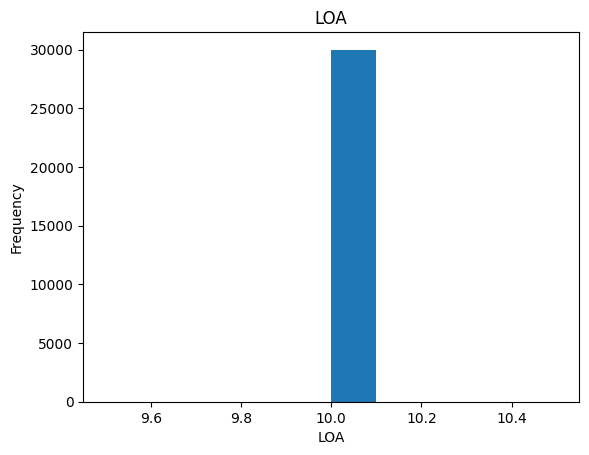

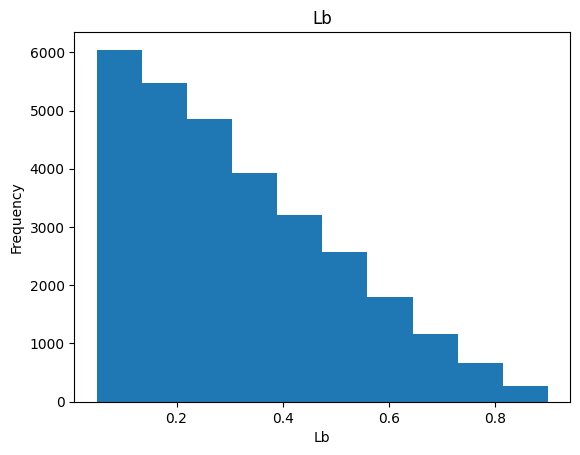

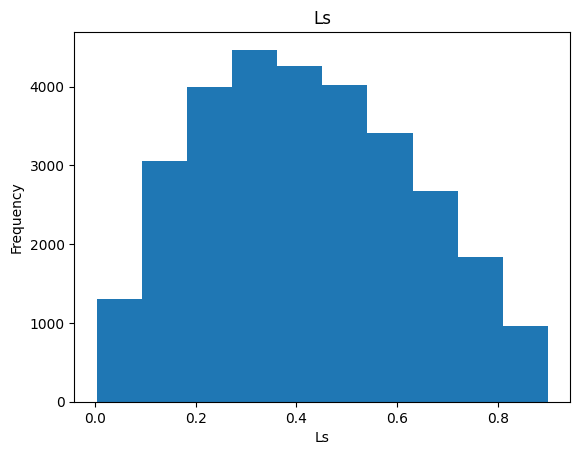

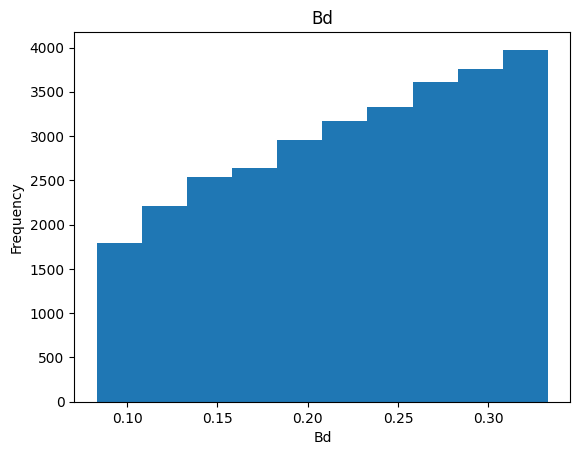

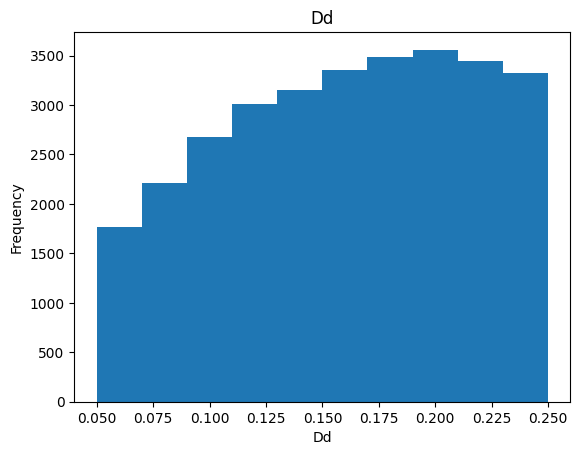

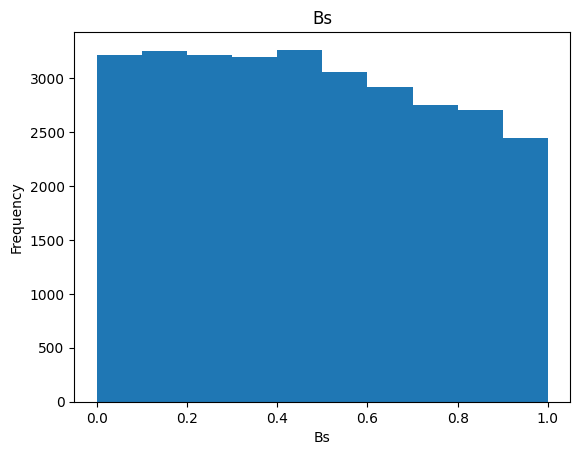

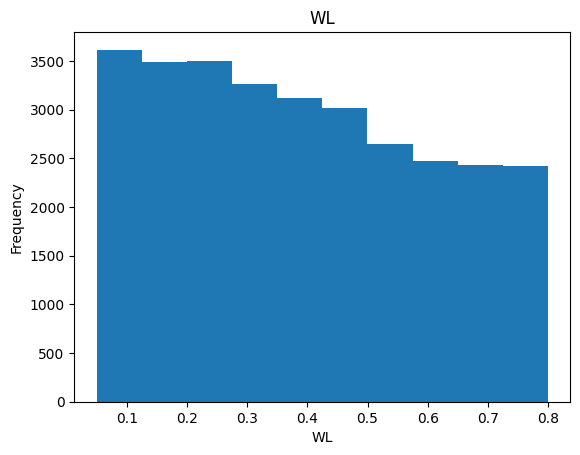

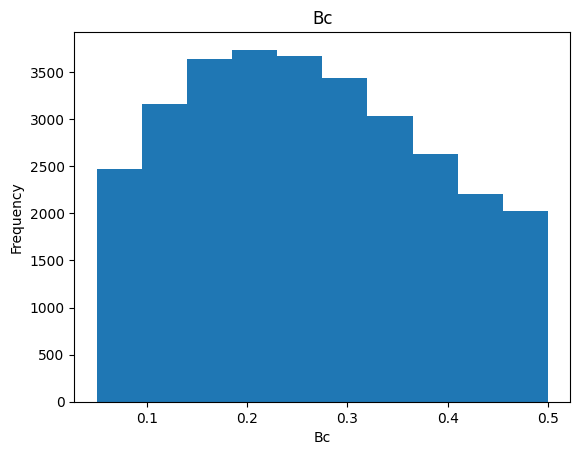

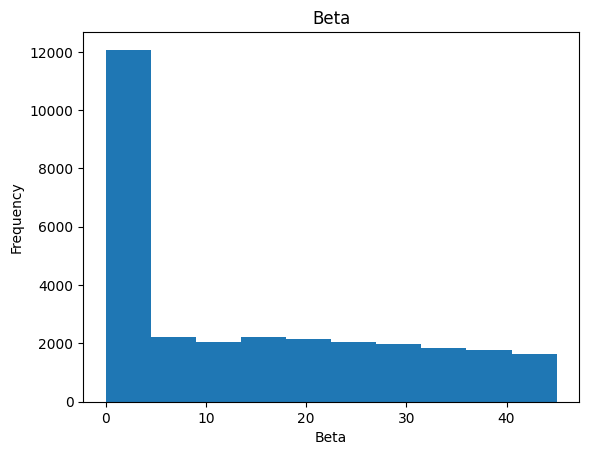

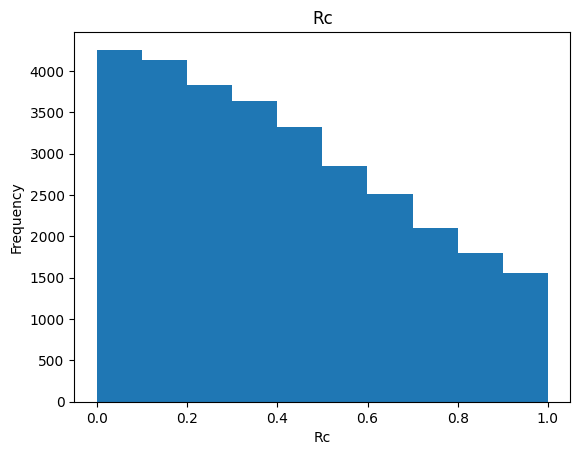

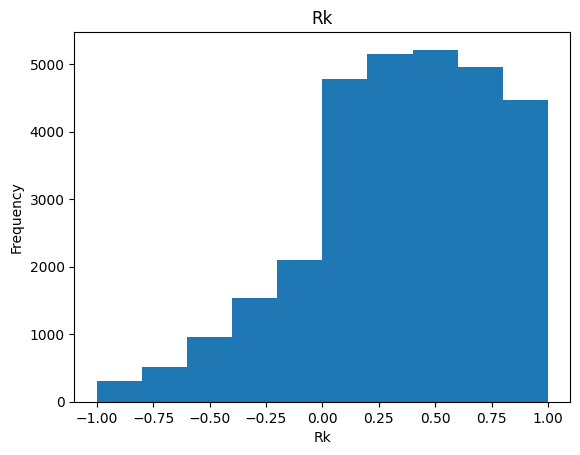

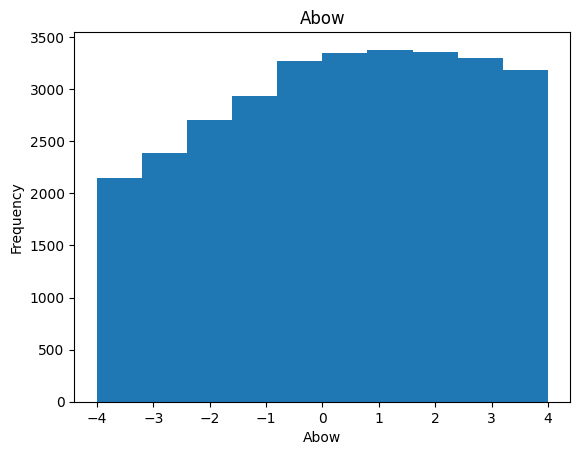

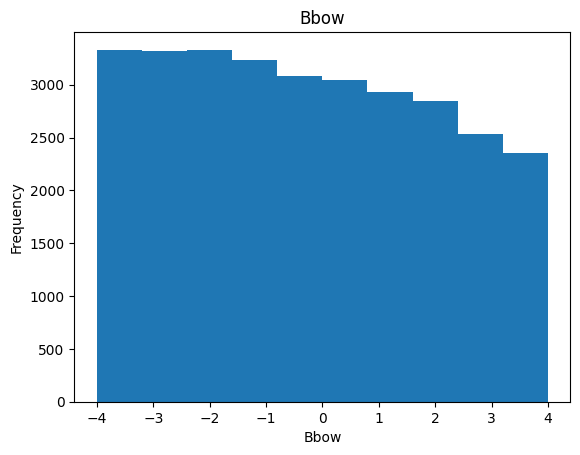

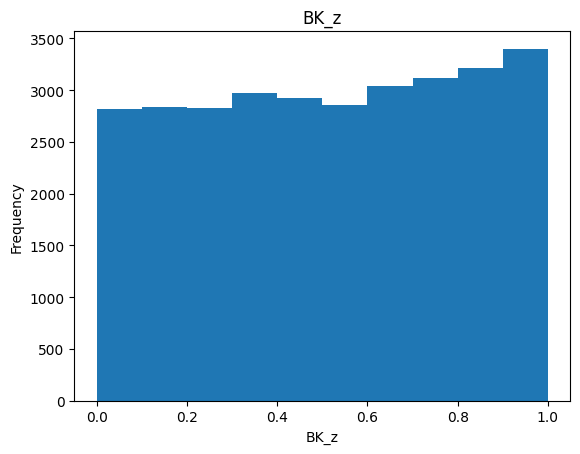

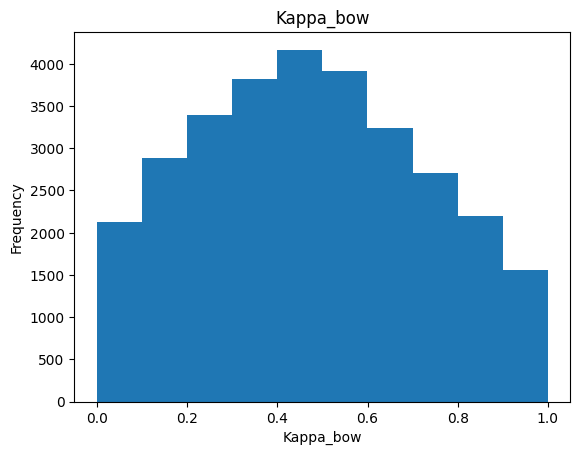

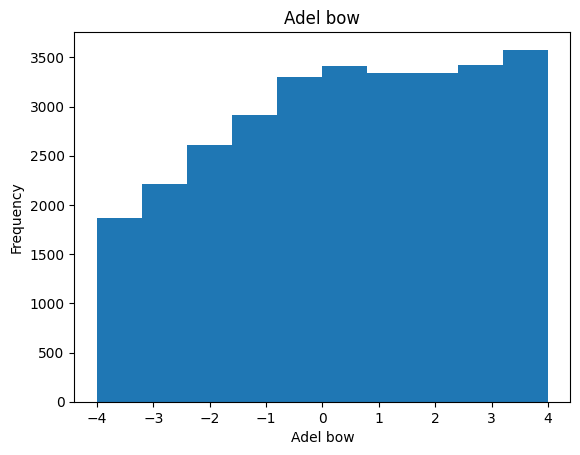

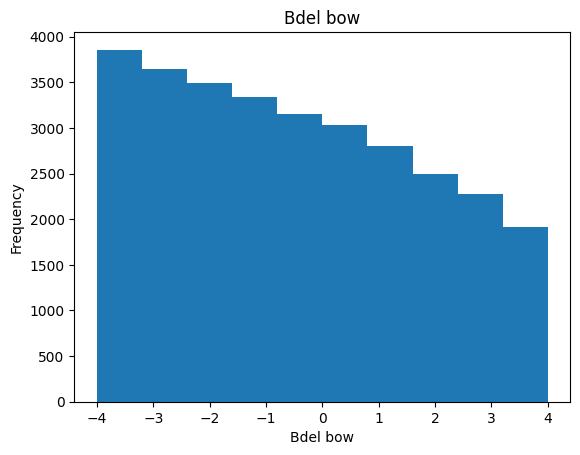

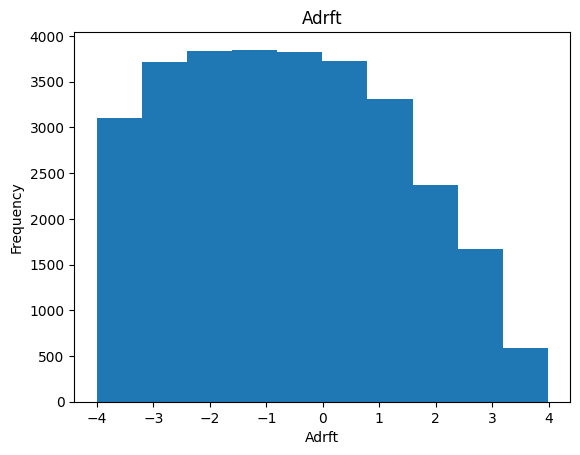

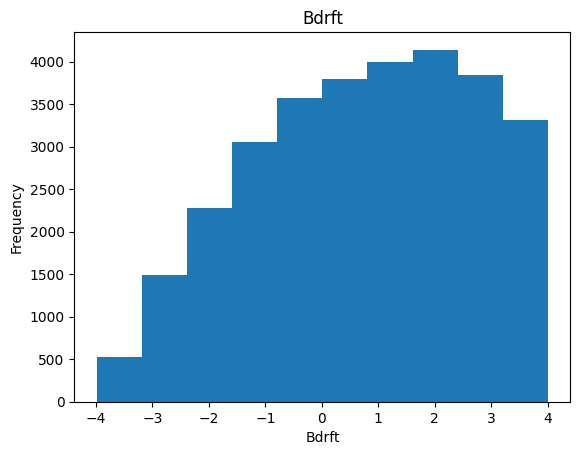

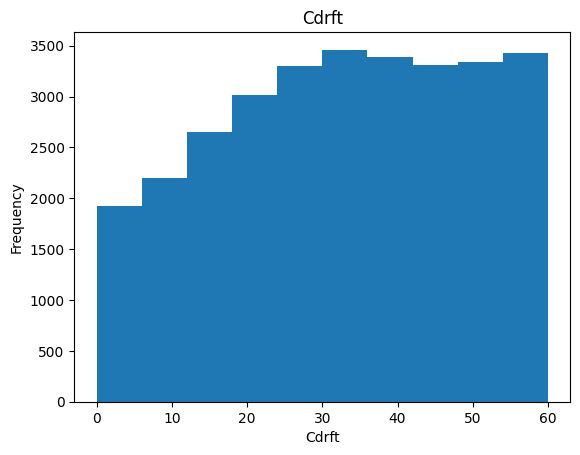

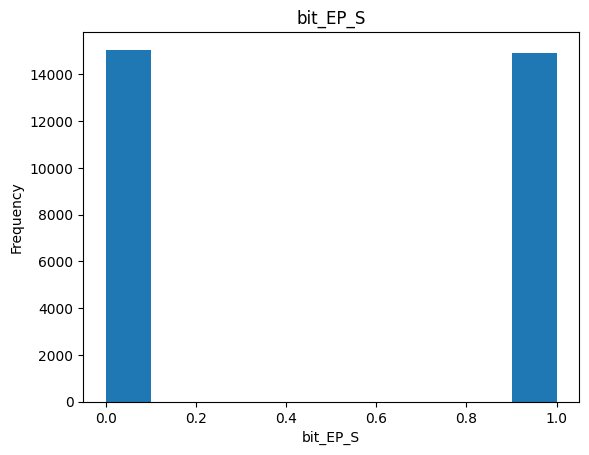

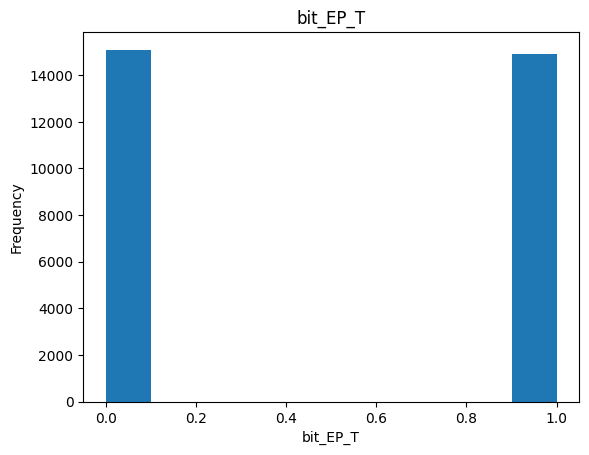

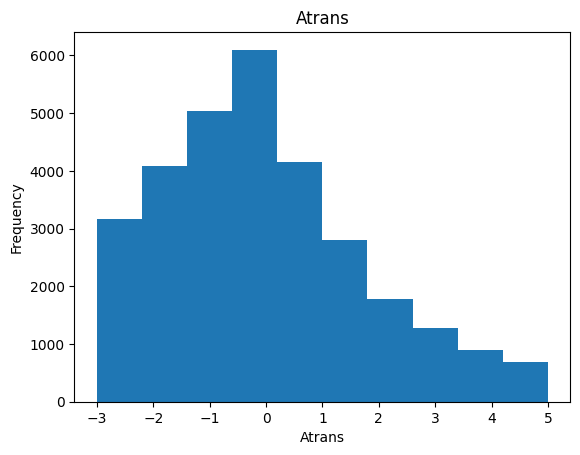

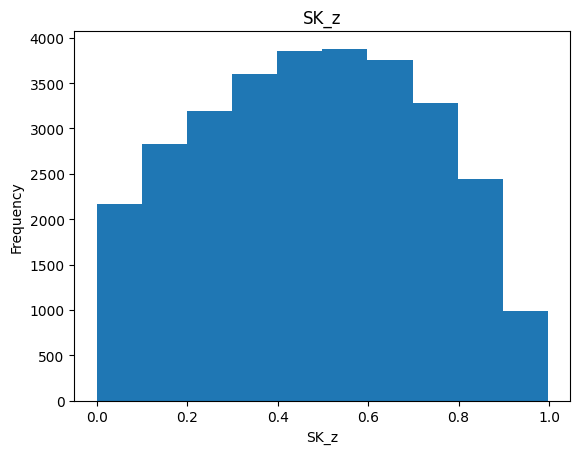

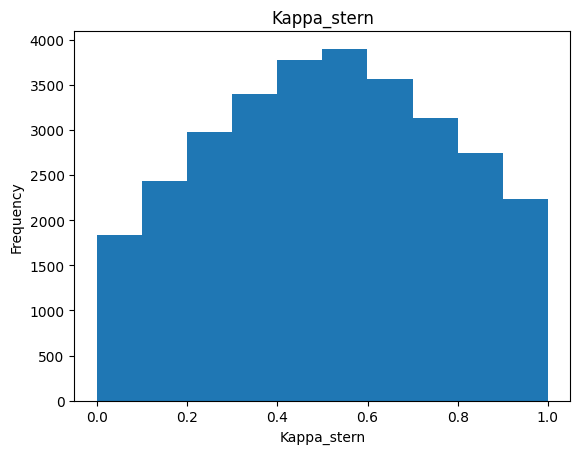

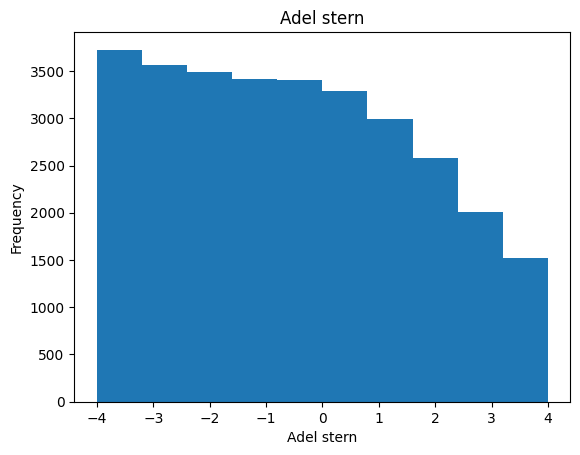

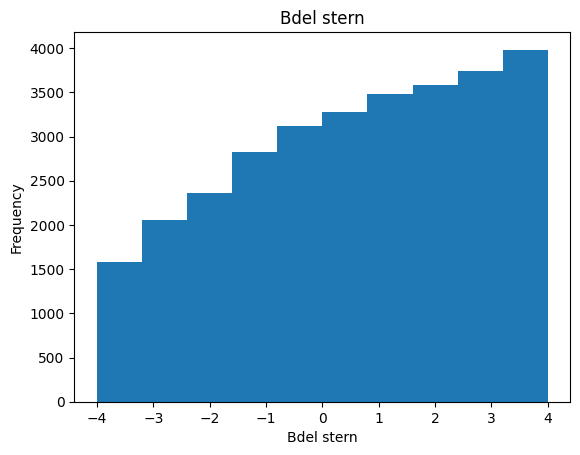

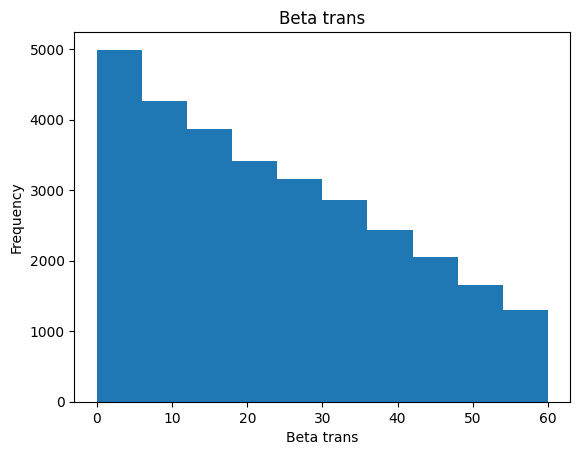

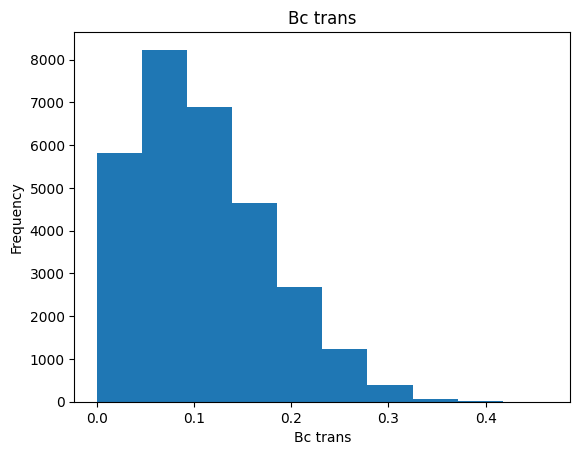

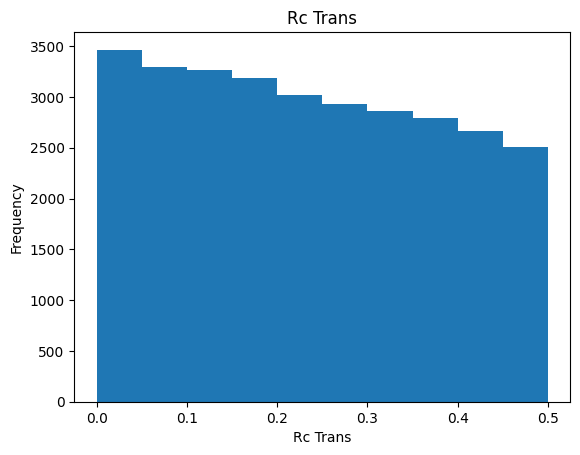

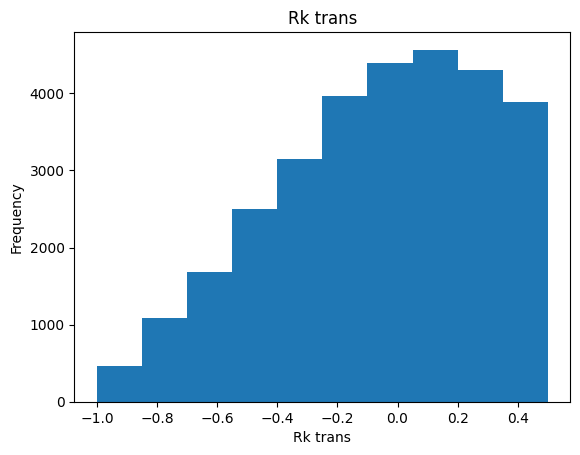

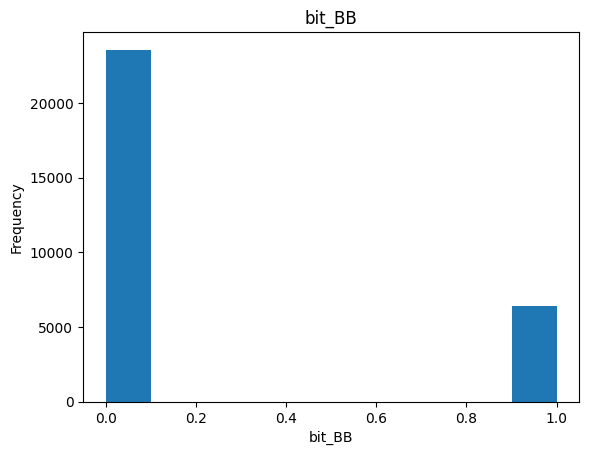

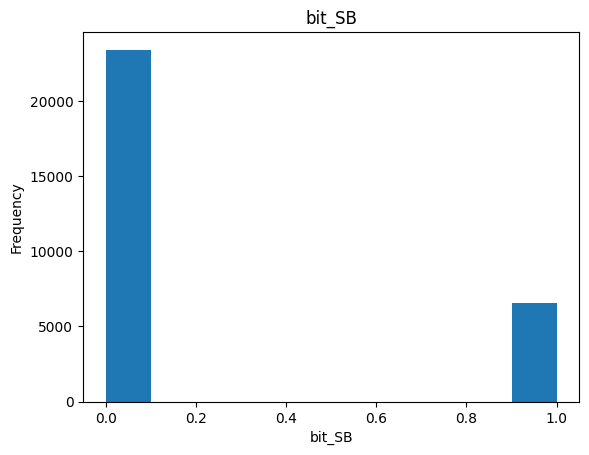

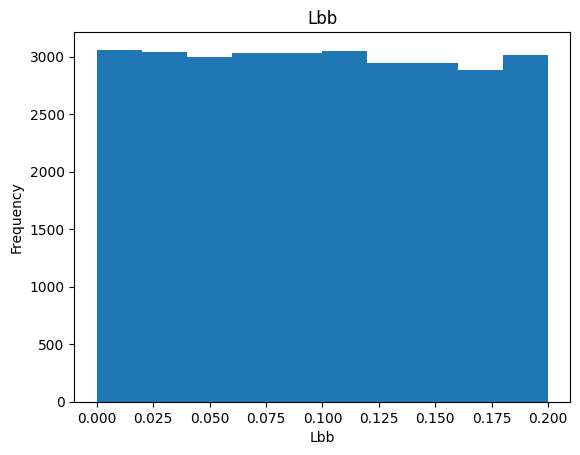

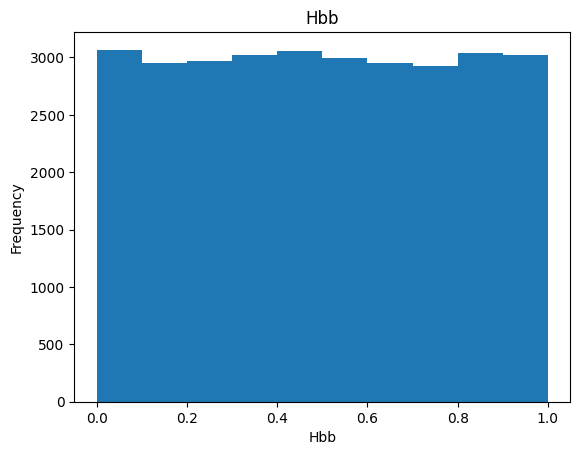

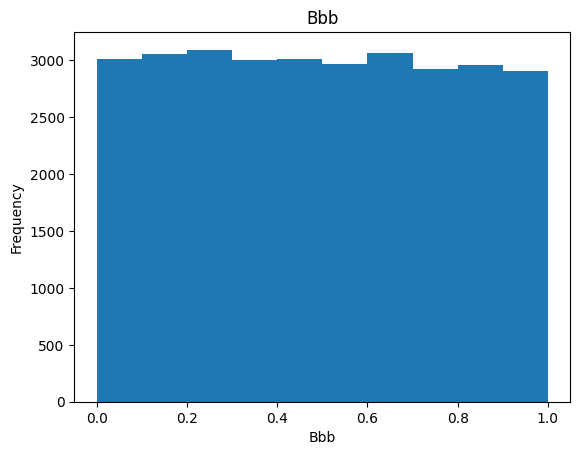

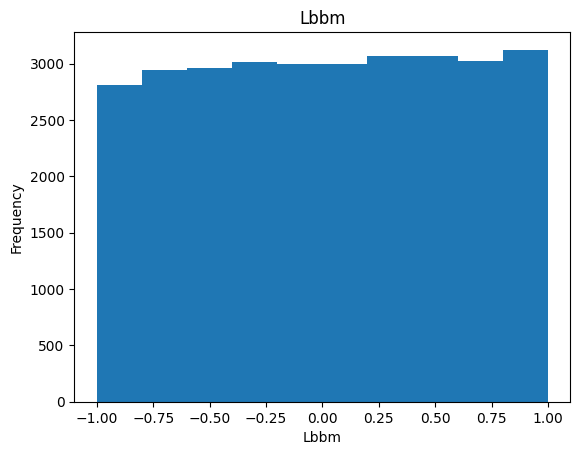

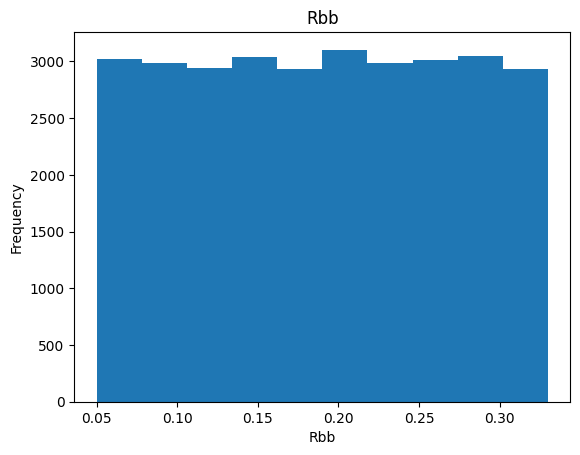

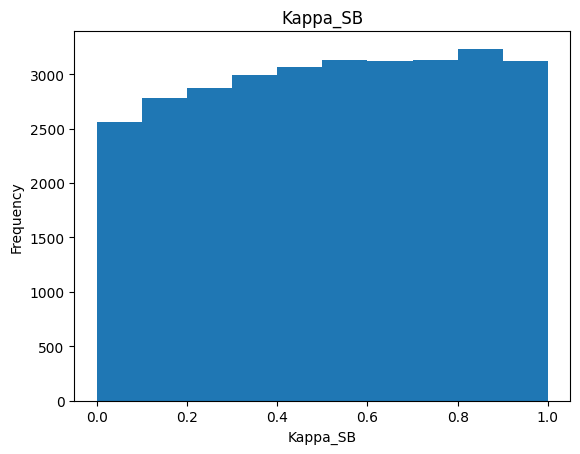

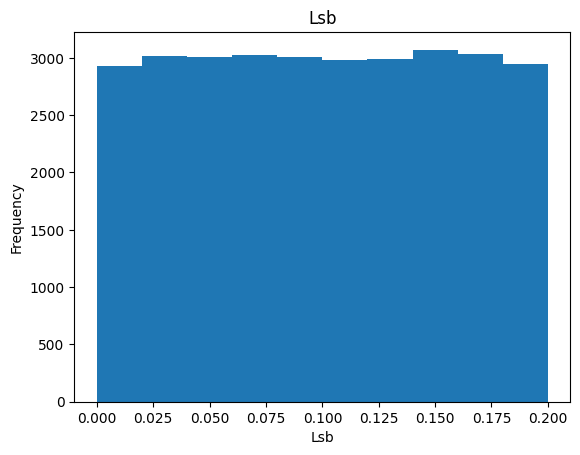

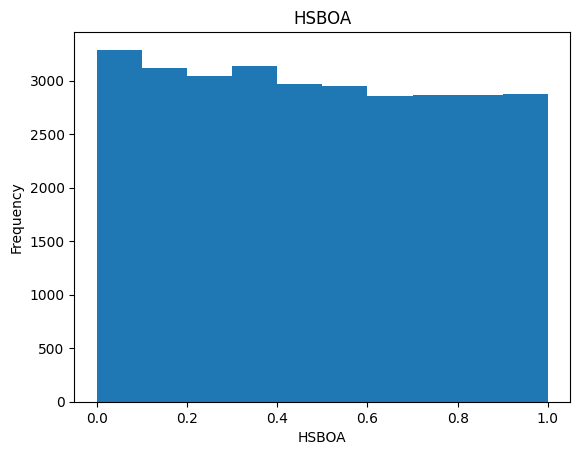

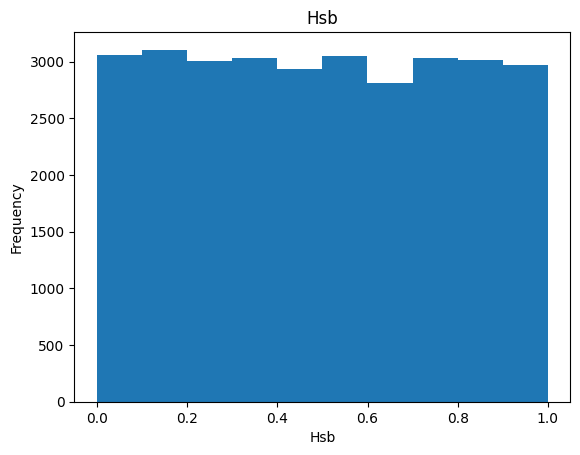

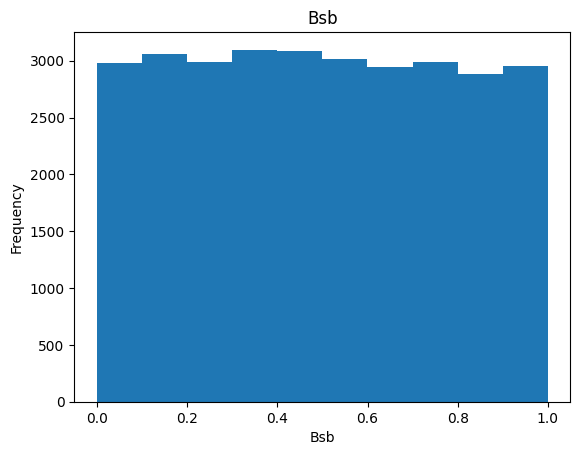

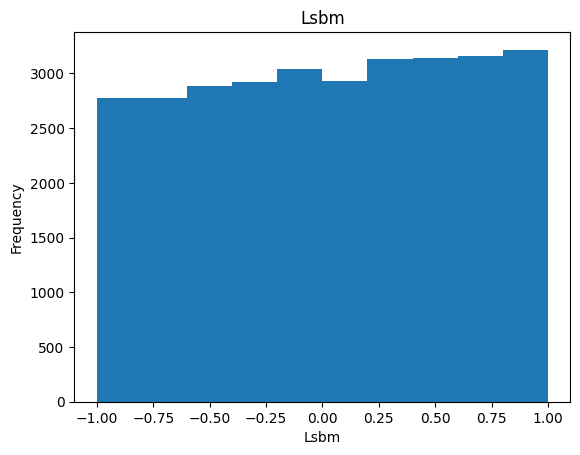

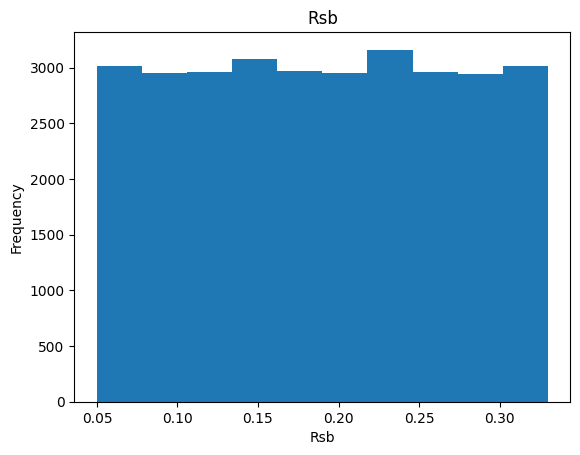

In [10]:
for i in range(2 ,47):
    col_name = df.columns[i]
    df[col_name].plot(kind= 'hist' ,title = col_name )
    plt.xlabel(col_name)
    plt.ylabel("Frequency")
    plt.show()

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [12]:
data = df.select_dtypes(include=[np.number])

In [13]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

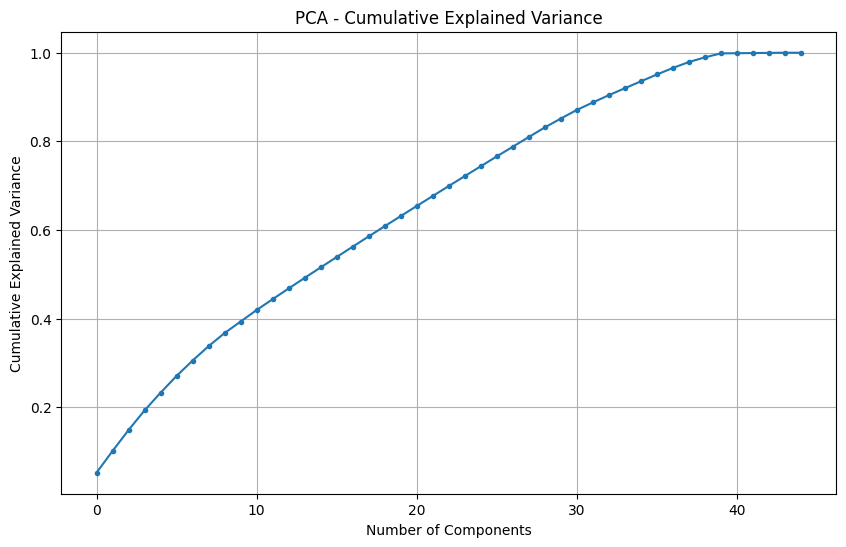

   Principal Component  Explained Variance Ratio
0                  PC1              5.235344e-02
1                  PC2              4.895881e-02
2                  PC3              4.729187e-02
3                  PC4              4.435095e-02
4                  PC5              3.986865e-02
5                  PC6              3.792555e-02
6                  PC7              3.453477e-02
7                  PC8              3.265212e-02
8                  PC9              2.954443e-02
9                 PC10              2.598793e-02
10                PC11              2.592926e-02
11                PC12              2.452097e-02
12                PC13              2.411609e-02
13                PC14              2.392141e-02
14                PC15              2.361643e-02
15                PC16              2.347209e-02
16                PC17              2.335483e-02
17                PC18              2.317755e-02
18                PC19              2.301580e-02
19                PC

In [14]:
# Apply PCA
pca = PCA()
pca.fit(data_scaled)
pca_data = pca.transform(data_scaled)

# Explained variance plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='.')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid()
plt.show()

# Display explained variance for each component
explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_
})
print(explained_variance_df)